<div style="text-align: right">CSCI E-7 Introduction to Python Programming for Life Sciences</div>
<div style="text-align: right">Dino Konstantopoulos, 4 March 2019, with material by Oliver Carlos and many other researchers on the Web whose code i liberally borrowed from</div>


# Iteration and Recursion: Mechanisms of Life


**Ribonucleic acid** (RNA, along with **DNA** and **proteins**, is one of the three major biological macromolecules that are essential for all known forms of life on our planet. A central tenet of molecular biology states that the flow of genetic information in a cell is from DNA through RNA to proteins: “DNA makes RNA makes protein”. 

Proteins are the workhorses of the cell; they play leading roles in the cell as enzymes, as structural components, and in cell signaling, to name just a few. 

DNA(deoxyribonucleic acid) is considered the “blueprint” of the cell; it carries all of the genetic information required for the cell to grow, to take in nutrients, and to propagate. 

RNA–in this role–is the “DNA photocopy” of the cell. When the cell needs to produce a certain protein, it activates the protein’s gene–the portion of DNA that codes for that protein–and produces multiple copies of that piece of DNA in the form of **messenger RNA**, or mRNA. 

The multiple copies of mRNA are then used to translate the genetic code into protein through the action of the cell’s protein manufacturing machinery, the **ribosomes**. Thus, RNA expands the quantity of a given protein that can be made at one time from one given gene, and it provides an important control point for regulating when and how much protein gets made.

For many years RNA was believed to have only three major roles in the cell–as a DNA photocopy (mRNA), as a coupler between the genetic code and the protein building blocks (tRNA), and as a structural component of ribosomes (rRNA). In recent years, however, we have begun to realize that the roles adopted by RNA are much broader and much more interesting. We now know that RNA can also act as enzymes (called ribozymes) to speed chemical reactions. In a number of clinically important viruses RNA, rather than DNA, carries the viral genetic information. 

RNA also plays an important role in regulating cellular processes–from cell division, differentiation and growth to cell aging and death. Defects in certain RNAs or the regulation of RNAs have been implicated in a number of important human diseases, including heart disease, some cancers, stroke and others.

The beauty of this machinery of life is how it uses smaller building blocks (DNA, RNA) to build bigger building blocks (proteins). Computer Science posesses this beauty, too. Your last homework (build forests from trees) was given as an introduction to this chapter, where we talk about **recursion** and **iteration**.

Iteration and recursion are key Computer Science techniques used in creating algorithms and developing software.

In simple terms, an iterative function is one that loops to repeat some part of the code, and a recursive function is one that calls itself again within itself, in order to repeat the code. 

Using a simple **for loop** to display list contents is an **iterative process**. Examples of simple recursive processes aren't easy to find, but solving the Tower of Hanoi are common examples.

In this notebook, we simulate RNA machinery in order to learn about iteration and recursion.


Your `plant_growth` function from last lecture produced a string. Then you **iterated** over that string to produce a new, more complex string. And so on, until ou have a realistic-lloking leaf.

In [1]:
def plant_growth(number, output="X", show=False):
    for i in range(number):
        new_output = ""
        for letter in output:
            # rule #1
            if letter == "X":
                new_output += "F-[[X]+X]+F[+FX]-X"
            elif letter == "F":
                new_output += "FF"
            else:
                new_output += letter
        output = new_output
        if show: print("n =", i+1, output, "[", len(output), "]")
    return output

In [2]:
plant=plant_growth(3, output="X", show=True)

n = 1 F-[[X]+X]+F[+FX]-X [ 18 ]
n = 2 FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X [ 89 ]
n = 3 FFFF-[[FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]+FFFF[+FFFFFF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X]-FF-[[F-[[X]+X]+F[+FX]-X]+F-[[X]+X]+F[+FX]-X]+FF[+FFF-[[X]+X]+F[+FX]-X]-F-[[X]+X]+F[+FX]-X [ 379 ]


Here's an interesting piece of turtle graphics:

In [4]:
import random
from turtle import Turtle

t=Turtle()
t.screen.bgcolor("black")
 
def random_drawing(turns,distance):
    for x in range(turns):
        right=t.right(random.randint(0,360))
        left=t.left(random.randint(0,360))
        t.color(random.choice(["blue","red","green"]))
        random.choice([right,left])
        t.fd(distance)
 
random_drawing(100,50)

KeyboardInterrupt: 

Let's write a function that draws a triangle with turtle graphics:

In [7]:
def draw_triangle(points, color, my_turtle):
    my_turtle.penup()
    my_turtle.goto(points[0][0],points[0][1])
    my_turtle.pendown()
    my_turtle.stroke = color
    #my_turtle.fill_color = Color(128, 0, 128)
    my_turtle.goto(points[1][0], points[1][1])
    my_turtle.goto(points[2][0], points[2][1])
    my_turtle.goto(points[0][0], points[0][1])

Here's a utility function that returns a point midway between 2 points, where we assume each point has two coordinates x and y:

In [8]:
def get_mid(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

### The Sierpinski Triangle

The [Sierpinski triangle](https://en.wikipedia.org/wiki/Sierpinski_triangle) is a fractal described in 1915 by Waclaw Sierpinski. It is a **self-similar** structure that occurs at different levels of iterations, or magnifications. 

You begin the pattern by finding the midpoints of the line segments of the largest triangle. Then, by connecting these midpoints, smaller triangles are created. This pattern is then repeated for the smaller triangles, and essentially has infinitely many possible iterations.

We will build a sierpinski triangle generating function to illustrate **recursion**.

In [9]:
def sierpinski(points, degree, my_turtle):
    #color = Color(*color_map[degree][1])
    color = my_turtle.color("red")
    draw_triangle(points, color, my_turtle)
    
    #clear_output(wait=True)
    #display(canvas)
    #time.sleep(0.5)
    
    #canvas.fill(color)
    if degree > 0:
       sierpinski(
                  [points[0], get_mid(points[0], points[1]), get_mid(points[0], points[2])],
                  degree-1, my_turtle)
       sierpinski(
                  [points[1], get_mid(points[0], points[1]), get_mid(points[1], points[2])],
                  degree-1, my_turtle)
       sierpinski(
                  [points[2], get_mid(points[2], points[1]), get_mid(points[0], points[2])],
                  degree-1, my_turtle)

Let's use turtle graphics to print it!

In [11]:
from turtle import Turtle
#canvas = Canvas(size=(800, 800))
#my_turtle = Turtle(canvas, (399, 399))
my_turtle = Turtle()
my_turtle.extras = {}
#my_points = [(40, 10), (10, 50), (70, 50)]
my_points = [(160, 40), (40, 200), (280, 200)]

color_map = [("blue", (0, 51, 153)),
             ('red', (153, 51, 51)), 
             ('green', (0, 153, 51)),
             ('white', (255, 255, 255)),
             ('yellow', (230, 230, 0)),
             ('violet', (172, 0, 230)),
             ('orange', (230, 172, 0))]
#color = Color(*color_map[degree][1])
color = my_turtle.color("red")

#draw_triangle(my_points, color, my_turtle)
sierpinski(my_points, 5, my_turtle)

TclError: invalid command name ".!canvas"

You will notice that as soon as you run the cell above, a new window is created and turtle graphics will get drawn in that window.

# Examples of iteration and recursion

Let's write a function, `list_sum()`, which takes in a Python container object and sums its contents. 

In [12]:
# non-recursive, iterative solution
def list_sum(nums):
    the_sum = 0
    for i in nums:
        the_sum = the_sum + i
    return the_sum

Let's use it!

In [13]:
import random
nums = random.choices(range(100), k=10)
nums

[74, 88, 56, 52, 76, 23, 13, 36, 42, 17]

In [14]:
list_sum(nums)

477

Now let's write the recursive analog of this function, which we'll call `list_sum_r()`:

In [15]:
def list_sum_r(nums):
    if len(nums) == 1:  # Base Case
        return nums[0]
    else:
        return nums[0] + list_sum_r(nums[1:]) 

In [16]:
list_sum_r(nums)

477

Do you see the way it works? It uses a computation pattern called **divide and conquer**. What it does is it takes one of the numbers in the list, $x$ and sums it to the rest by calling itself with a slightly smaller list than initially: the list minus the number $x$. Eventually, when the number of elements in the list reduces to 1, the recursive function ends the recursion by returning that last number.

The best way to think about recursion in my opinion is to tahking about having multiple conversations: You start talking with Joe, then Sue interrupts, you freeze the conversation with Joe (and Joe alongside it), and you continue with Sue. Then Sam interrupts, so you freeze Sue, and continue on with Sam. When Sam is done, you unfreeze Sue. When Sue is done, you unfreeze Joe. And then you're done. 

And nothing stops you from talking about Joe while he's frozen and you're talking to Sue. So this [russian dolls](https://en.wikipedia.org/wiki/Matryoshka_doll) process should not throw you off.

Python's *sys* module has a limit to the number of conversation freezes it can handle, though. And that is because Python, just like you, needs a lot memory to store all frozen conversations.

In [17]:
import sys
sys.getrecursionlimit()

3000

Here is the factorial function in recursive form:

In [18]:
def fact(n):
    if n == 0:  # 0! == 1
        return 1
    else:
        return n * fact(n - 1)

In [19]:
for i in range(12): print(f"{i}: {fact(i)}")

0: 1
1: 1
2: 2
3: 6
4: 24
5: 120
6: 720
7: 5040
8: 40320
9: 362880
10: 3628800
11: 39916800


Here's the greatest common divisor for integers in recursive form:

In [20]:
def gcd(a,b):
    if b == 0:
        return a
    elif a < b:
        return gcd(b,a)
    else:
        return gcd(a-b, b)

In [21]:
gcd(24, 12)

12

And here's a slightly optimized version:

In [22]:
def gcd2(a, b):
    if b == 0:
        return a
    else:
        return gcd2(b, a%b)

In [23]:
gcd2(16, 24)

8

The [Tower of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) is a mathematical game or puzzle. It consists of three rods and a number of disks of different sizes, which can slide onto any rod. The puzzle starts with the disks in a neat stack in ascending order of size on one rod, the smallest at the top, thus making a conical shape.

The objective of the puzzle is to move the entire stack to another rod, obeying the following simple rules:

* Only one disk can be moved at a time.
* Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.
* No larger disk may be placed on top of a smaller disk.

Here's the recursive solution of the game:

In [24]:
def move_tower(height, from_pole, to_pole, with_pole):
    if height >= 1:
        move_tower(height-1, from_pole, with_pole, to_pole)
        move_disk(from_pole, to_pole)
        move_tower(height-1, with_pole, to_pole, from_pole)
        
def move_disk(fp, tp):
    print("moving disk from", fp, "to", tp)

In [25]:
move_tower(3, "A", "B", "C")

moving disk from A to B
moving disk from A to C
moving disk from B to C
moving disk from A to B
moving disk from C to A
moving disk from C to B
moving disk from A to B


And here's the iterative analog:

In [26]:
def hanoi_iter(height, fromPole, toPole, withPole):
        if height % 2 == 0:
            poles = [fromPole, withPole, toPole]
        else:
            poles = [fromPole, toPole, withPole]
        stacks = [range(height, 0, -1), [height], [height]]
        for i in range(2**height-1):
            if i % 2 == 0:  # move little disk
                fd = (i//2)%3
                td = (i//2+1)%3
            else:           # move other disk
                fd = (i//2)%3
                td = (i//2+2)%3
                if (stacks[fd][len(stacks[fd])-1] > 
                    stacks[td][len(stacks[td])-1]):
                    td = (i//2)%3
                    fd = (i//2+2)%3
                stacks[td].append(list(stacks[fd]).pop())
            move_disk(poles[fd], poles[td])

In [27]:
hanoi_iter(3, "A", "B", "C")

moving disk from A to B
moving disk from A to C
moving disk from B to C
moving disk from A to B
moving disk from C to A
moving disk from C to B
moving disk from A to B


Which one do you think is easier to understand? Which one is easier to implement?

Here are two famous **sorting algorithms** in computer science. A [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort), a simple sorting algorithm that repeatedly steps through the list, compares adjacent pairs and swaps them if they are in the wrong order, with the pass repeated through the list until the list is sorted, is most often implemented iteratively. A [merge sort](https://en.wikipedia.org/wiki/Merge_sort), a divide and conquer algorithm that was invented by John von Neumann in 1945, which divides the unsorted list into n sublists, each containing one element (a list of one element is considered sorted), then repeatedly merges sublists to produce new sorted sublists until there is only one sublist remaining, the sorted list, is implemented recursively.

In [33]:
from random import choices
nums = choices(range(1_000_000), k=8000)

In [34]:
len(nums)

8000

In [35]:
def bubble_sort(alist):
    for passnum in range(len(alist)-1, 0, -1):
        for i in range(passnum):
            if alist[i] > alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

In [36]:
%%time
bubble_sort(nums)

CPU times: user 12.6 s, sys: 23.3 ms, total: 12.6 s
Wall time: 12.9 s


In [37]:
','.join([str(x) for x in nums[0:100]])

'76,161,163,427,472,492,624,676,678,701,824,1026,1074,1196,1411,1588,1745,1877,1929,1985,2048,2114,2330,2549,2552,2774,2991,3054,3333,3568,3723,3888,4003,4238,4279,4345,4358,4430,4473,4507,4535,4605,4622,4847,4885,5065,5100,5298,5557,5791,5907,6557,6680,6688,6878,6941,6955,7040,7180,7201,7221,7250,7322,7328,7354,7507,7775,7824,7894,8069,8310,8384,8458,8533,8713,8717,8829,8888,9000,9027,9134,9200,9439,9496,9534,9665,9688,9693,9709,9716,9873,10147,10403,10537,10739,10748,10866,11509,11515,11721'

In [38]:
def merge_sort(alist):
    #print("Splitting ", alist)
    
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i = 0
        j = 0
        k = 0
        
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
                
            k += 1
                
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i += 1
            k += 1
            
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j += 1
            k += 1

In [39]:
%%time
merge_sort(nums)

CPU times: user 66.2 ms, sys: 970 µs, total: 67.2 ms
Wall time: 66.7 ms


Here's a **stack class**, a famous structure in computer science that Python (and any other language) uses to implement recursion (to freeze "conversations"). A [stack](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) is an abstract data type that serves as a collection of elements, with two principal operations:

* `push`, which adds an element to the collection, and
* `pop`, which removes the most recently added element that was not yet removed.

In [40]:
class Stack:
    def __init__(self):
        self.items = []  # data structure
        
    def is_empty(self):
        return self.items == []
    
    def push(self, item):
        self.items.append(item)
        
    def pop(self):
        if self.is_empty():
            raise IndexError("Pop from an empty stack")
            
        #item = self.items[-1]
        #del self.items[-1]
        #return item
        return self.items.pop()
        
    def peek(self):
        return self.items[-1]
    
    def size(self):
        return len(self.items)

Let's use it to check an expression for balanced parentheses:

In [41]:
def par_checker(symbol_str):
    s = Stack()
    balanced = True
    index = 0
    
    while index < len(symbol_str) and balanced:
        symbol = symbol_str[index]
        if symbol == '(':
            s.push(symbol)
        else:
            if s.is_empty():
                balanced = False
            else:
                s.pop()
        print(balanced, symbol, s.items)
        index += 1
    
    return balanced and s.is_empty()

In [42]:
print(par_checker('((()))'))

True ( ['(']
True ( ['(', '(']
True ( ['(', '(', '(']
True ) ['(', '(']
True ) ['(']
True ) []
True


In [43]:
print(par_checker('(()'))

True ( ['(']
True ( ['(', '(']
True ) ['(']
False


In [44]:
print(par_checker('(((()))'))

True ( ['(']
True ( ['(', '(']
True ( ['(', '(', '(']
True ( ['(', '(', '(', '(']
True ) ['(', '(', '(']
True ) ['(', '(']
True ) ['(']
False


In [45]:
print(par_checker('(()()))'))

True ( ['(']
True ( ['(', '(']
True ) ['(']
True ( ['(', '(']
True ) ['(']
True ) []
False ) []
False


Now we're going to use parenthesis to represent **folding** in RNA structures.

**RNA folding** is the process by which a linear ribonucleic acid (RNA) molecule acquires secondary structure through intra-molecular interactions. The folded domains of RNA molecules are often the sites of specific interactions with proteins in forming RNA–protein (ribonucleoprotein) complexes. A fascinating story in biology, read more about it [here](https://cshperspectives.cshlp.org/content/10/10/a032433.full).

Then we're going to study population genetics in an RNA world, and then finally evolve a very important class of algorithms called **genetic algorithms**, which help in solving your tree/forest homework.

# Population Genetics in an RNA World

In order to study population genetics, we first need a model of a population. And even before that, we need to define what we mean by population. For our purposes, we will simply say that a population is a set of individuals sharing a common environment. And because this is population genetics we can think of individuals as entities comprising of specific genes or chromosomes.

Let's create and studying our own "artificial" populations to illustrate some important population genetics concepts and methodologies. 

As you may know, RNA is widely thought to be the first self replicating life-form to arise many billion years ago. One of the strongest arguments for this theory is that RNA is able to carry information in its nucleotides like DNA, and like protein, it is able to adopt higher order structures to catalyze reactions, such as self replication. So it is likely, and there is growing evidence that this is the case, that the first form of replicating life was RNA. And because of this dual property of RNA as an information vessel as well as a structural/functional element we can use RNA molecules to build very nice population models.


## Building an RNA population

RNA has the nice property of posessing a strong mapping between information carrying (sequence) and function (structure). This is analogous to what is known in evolutionary terms as a **genotype** and a **phenotype**. With these properties, we have everything we need to model a population, and simulate its evolution.

### RNA sequence-structure

We can think of the genotype as a sequence s
consisting of letters/nucleotides from the alphabet {U,A,C,G}. The corresponding phenotype ω is the secondary structure of s, which can be thought of as a pairing between nucleotides in the primary sequence that give rise to a 3D architecture. Because it has been shown that the function of many biomolecules, including RNA, is driven by structure, this gives us a good proxy for phenotype.

[Here's](http://www.bioinf.man.ac.uk/resources/phase/manual/node72.html) an example of what an RNA secondary structure, or pairing, might look like.

From this [paper](http://www.bioinf.uni-leipzig.de/Leere/SS15/Bioinf2/lengauer.pdf), you can see that unpaired positions form loop-like structures, and paired positions form stem-like structures. It is this spatial arrangement of nucleotides that drives RNA's function. Therefore, another sequence that adopts a similar shape, is likely to behave in a similar manner. 

Although in reality this is often not the case, we will only allow pairs between {C,G} and {A,U} nucleotides in this notebook.

How do we go from a sequence to a structure? A secondary structure is just a list of pairings between positions. How do we get the optimal pairing?

The algorithm we're going to be using is known as the [Nussinov Algorithm](http://math.mit.edu/classes/18.417/Slides/rna-prediction-nussinov.pdf). The Nussinov algorithm is one of the first and simplest attempts at predicting RNA structure. Because bonds tend to stabilize RNA, the algorithm tries to maximize the number of pairs in the structure and return that as its solution. 

Current approaches achieve more accurate solutions by using energy models based one experimental values to then obtain a structure that minimizes free energy. Here's how we're going to simulate the nussinov algorithm. I just browsed the Web and found something simple to work with :-)

Ok, maybe not that simple. But do not worry about it. We'll predict secondary structures by calling nussinov() with a sequence string and it will return a tuple in the form (structure, pairs). And our pairs are going to consist of a sequence of balanced parenthesis that bond pairs in the linear sequence.

We start off by importing `numpy`, the most famous Python library: *the one that gives you performance*!

In [46]:
import numpy as np
min_loop_length = 4

def pair_check(tup):
    if tup in [('A', 'U'), ('U', 'A'), ('C', 'G'), ('G', 'C')]:
        return True
    return False

def OPT(i,j, sequence):
    """ returns the score of the optimal pairing between indices i and j"""
    #base case: no pairs allowed when i and j are less than 4 bases apart
    if i >= j-min_loop_length:
        return 0
    else:
        #i and j can either be paired or not be paired, if not paired then the optimal score is OPT(i,j-1)
        unpaired = OPT(i, j-1, sequence)

        #check if j can be involved in a pairing with a position t
        pairing = [1 + OPT(i, t-1, sequence) + OPT(t+1, j-1, sequence) for t in range(i, j-4)\
                   if pair_check((sequence[t], sequence[j]))]
        if not pairing:
            pairing = [0]
        paired = max(pairing)


        return max(unpaired, paired)


def traceback(i, j, structure, DP, sequence):
    #in this case we've gone through the whole sequence. Nothing to do.
    if j <= i:
        return
    #if j is unpaired, there will be no change in score when we take it out, so we just recurse to the next index
    elif DP[i][j] == DP[i][j-1]:
        traceback(i, j-1, structure, DP, sequence)
    else:
        #try pairing j with a matching index k to its left.
        for k in [b for b in range(i, j-min_loop_length) if pair_check((sequence[b], sequence[j]))]:
            #if the score at i,j is the result of adding 1 from pairing (j,k) and whatever score
            #comes from the substructure to its left (i, k-1) and to its right (k+1, j-1)
            if k-1 < 0:
                if DP[i][j] == DP[k+1][j-1] + 1:
                    structure.append((k,j))
                    traceback(k+1, j-1, structure, DP, sequence)
                    break
            elif DP[i][j] == DP[i][k-1] + DP[k+1][j-1] + 1:
                #add the pair (j,k) to our list of pairs
                structure.append((k,j))
                #move the recursion to the two substructures formed by this pairing
                traceback(i, k-1, structure, DP, sequence)
                traceback(k+1, j-1, structure, DP, sequence)
                break

def write_structure(sequence, structure):
    dot_bracket = ["." for _ in range(len(sequence))]
    for s in structure:
        dot_bracket[min(s)] = "("
        dot_bracket[max(s)] = ")"
    return "".join(dot_bracket)


#initialize matrix with zeros where can't have pairings
def initialize(N):
    #NxN matrix that stores the scores of the optimal pairings.
    DP = np.empty((N,N))
    DP[:] = np.NAN
    for k in range(0, min_loop_length):
        for i in range(N-k):
            j = i + k
            DP[i][j] = 0
    return DP

def nussinov(sequence):
    N = len(sequence)
    DP = initialize(N)
    structure = []

    #fill the DP matrix
    for k in range(min_loop_length, N):
        for i in range(N-k):
            j = i + k
            DP[i][j] = OPT(i,j, sequence)

    #copy values to lower triangle to avoid null references
    for i in range(N):
        for j in range(0, i):
            DP[i][j] = DP[j][i]


    traceback(0,N-1, structure, DP, sequence)
    return (sequence, write_structure(sequence, structure))

print(nussinov("ACCCGAUGUUAUAUAUACCU"))

('ACCCGAUGUUAUAUAUACCU', '(...(..(((....).))))')


The funny dot-bracket string in the output is a representation of the seconday structure of an RNA nucleotide. 

Quite simply, a matching pair of parentheses (open and close) correspond to the nucleotides at those positions being paired. Whereas, a dot means that that position is unpaired in the structure. 

In [47]:
sequence_to_fold = "ACCCGAUGUUAUAUAUACCU"
struc = nussinov(sequence_to_fold)
print(struc)
print(sequence_to_fold)
print(struc[0])
print(struc[1])

('ACCCGAUGUUAUAUAUACCU', '(...(..(((....).))))')
ACCCGAUGUUAUAUAUACCU
ACCCGAUGUUAUAUAUACCU
(...(..(((....).))))


Let's move on to building our populations.

## Fitness of a sequence: Target Structure

Now that we have a good way of getting a phenotype (secondary structure), we need a way to evaluate the fitness of that phenotype. 

If we think in real life terms, fitness is the ability of a genotype to replicate into the next generation. If you have a gene carrying a mutation that causes some kind of disease, your fitness is decreased and you have a lower chance of contributing offspring to the next generation. 

On a molecular level the same concept applies. A molecule needs to accomplish a certain function, i.e. bind to some other molecule or send some kind of signal. And as we've seen before, the most important factor that determines how well it can carry out this function is its **structure**. 

So we can imagine that a certain structure, we can call this a 'target' structure, is required in order to accomplish a certain function. So a sequence that folds correctly to a target structure is seen as having greater fitness than one that does not. 

Since we've encoded structures as simple dot-bracket strings, we can easily compare structures and thus evaluate the fitness between a given structure and the target, or 'correct' structure.

There are many ways to compare structures w1 and w2, but we're going to use one of the simplest ways, which is base-pair distance. This is just the number of pairs in w1 that are not in w2. 

In [48]:
#ss_to_bp() and bp_distance() by Vladimir Reinharz.
# https://www.researchgate.net/publication/236249566_RNAiFOLD_a_constraint_programming_algorithm_for_RNA_inverse_folding_and_molecular_design

def ss_to_bp(ss):
    bps = set()
    l = []
    for i, x in enumerate(ss):
            if x == '(':
                    l.append(i)
            elif x == ')':
                    bps.add((l.pop(), i))
    return bps

def bp_distance(w1, w2):
    """
    return base pair distance between structures w1 and w2. 
    w1 and w2 are lists of tuples representing pairing indices.
    """
    return len(set(ss_to_bp(w1)).symmetric_difference(set(ss_to_bp(w2))))

#let's fold two sequences
w1 = nussinov("CCAAAAGG")
w2 = nussinov("ACAAAAGA")

print(w1[-1], ss_to_bp(w1[-1]))
print(w2[-1], ss_to_bp(w2[-1]))

#give the list of pairs to bp_distance and see what the distance is.
print(bp_distance(w1[-1], w2[-1]))

((....)) {(1, 6), (0, 7)}
.(....). {(1, 6)}
1


# Defining a cell: a little bit of Object Oriented Programming (OOP)

Since we're going to be playing aroudn with sequences and structures and fitness values a lot, it's best to package it all nicely into an object. As we already mentionned OOP, classes and objects, are just a nice way of **grouping** data and logic into an easily accessible form.

From [here](https://opentextbc.ca/biology/chapter/6-1-the-genome/), we learn all we need to know about human genetics, for now:

A **somatic cell** contains *two matched sets of chromosomes*, a configuration known as **diploid**. The letter n is used to represent a single set of chromosomes; therefore a diploid organism is designated 2n. 

Human cells that contain one set of 23 chromosomes are called **gametes**, or **sex cells**. These eggs and sperm are designated n, or **haploid**.

Matched pairs of chromosomes in a diploid organism are called **homologous chromosomes**. Each copy of the homologous pair of chromosomes originates from a *different parent*. Therefore, the copies of each of the genes themselves may not be identical. The variation of individuals within a species is caused by the specific combination of the genes inherited from *both* parents.

We're trying to simulate evolution on a very simple kind of organism, or cell. It contains two copies of a RNA gene, each with its corresponding structure.

In [49]:
class Cell:
    def __init__(self, seq_1, struc_1, seq_2, struc_2):
        self.sequence_1 = seq_1
        self.sequence_2 = seq_2
        self.structure_1 = struc_1
        self.structure_2 = struc_2
        
#for now just try initializing a Cell with made up sequences and structures - just make sure parenses are balanced!
cell = Cell("AACCCCUU", "((.....))", "GGAAAACA", "(....).")
print(cell.sequence_1, cell.structure_1, cell.sequence_2, cell.structure_2)

AACCCCUU ((.....)) GGAAAACA (....).


## Populations of Cells

Now we've defined a `Cell`. Since a population is a collection of individuals, populations will naturally consist of lists of 'Cell' objects, each with their own sequences. Here we initialize all Cells with random sequences and add them to the 'population' list.


In [50]:
import random

def populate(target, pop_size=100):
    
    population = []

    for i in range(pop_size):
        #get a random sequence to start with
        sequence1 = "".join([random.choice("AUCG") for _ in range(len(target))])
        sequence2 = "".join([random.choice("AUCG") for _ in range(len(target))])
        #use nussinov to get the secondary structure for the sequence
        structure1 = nussinov(sequence1)
        structure2 = nussinov(sequence2)
        #add a new Cell object to the population list
        new_cell = Cell(sequence1, structure1, sequence2, structure2)
        new_cell.id = i
        new_cell.parent = i
        population.append(new_cell)
            
    return population

Try creating a new population and printing the first 10 sequences and structures (in dot-bracket)!

In [51]:
target = "(.(((....).).).)...."
pop = populate(target, pop_size=100)
for p in pop[:10]:
    print(p.id, p.sequence_1, p.structure_1[1], p.sequence_2, p.structure_2[1])

0 CUAGGAUAGUCCCGUUGGUG (.(((.....))(....))) GUUGGGUUCGGAUGCCAUGC ((.((.(....)..)))..)
1 GAUUUGUUACUGAGCAGCUC (((..((.....).))..)) GAGAUAGUACAGACGAACAC (.(.(.((....)).).).)
2 ACUGAACAGGCAAGCAACUG ((((......)).)....). UUAUGCAUAGAGAGGAGUUA (.((.(.(....)).).).)
3 CGGAGAGUUGAACGUUUUGU (..(....))((....)).. CGAAUCCAAAGAUACAGCUU (((.((....))).).)...
4 ACGUUAACGUAGAUUUUAUG (((....))((....).)). CACCUGCGUUACACACCUGA ((...(.((.....))))).
5 UGGUCUGUCUCACAGUCCUC .((.(((.....))).)).. AUCGCGGUCCAUGGUGGAGG ..(.(..(((.....)))))
6 UUUGAUGUGCUGUACUGGUG ....(.((.....))).... CUCGUAGUGCCCCAGAUGGG ((((..(....)).)).)..
7 AGAUGGUAUGAGAUUCGUAC ((((......)..).).).. CUUGCUAAUUUUAGCUUGAA .((((((....))))...))
8 AACAUUCCCGUUUGUUGGUA ((((......)..))).... UAGACUAUACGGGUGGGAAG ....((.((....)...)))
9 CCAGUUGGAUGUAUCCCCAG (..(..(((....))))..) ACACAUGCUGGGCCACUACA (((.....))(....))...


## The Fitness of a Cell

Now that we can store populations of cells, we need a way to evaluate the fitness of a given Cell. Recall that a Cell is simply an object that contains **two RNA sequences** (think of it as two copies of a gene on each chromosome).

So we simply need to loop through each Cell in a population and compute base pair distance to the target structure. However, simply using base-pair distance is not a very good measure of fitness. There are two reasons for this:

* We want fitness to represent a **probability** that a cell will reproduce, and base pair distance is an integer.
* We want this probability to be a **relative measure**. That is, we want to be the fitness to be proportional to how good a cell is with respect to all others in the population. This touches on an important principle in evolution where we only need to be 'better' than the competition and not good in some absolute measure. For example, if you and I are being chased by a lion. In order to survive, I only need to be faster than you, and not necessarily some absolute level of fitness.

In order to get a probability (number between 0 and 1) we use the following equation to define the fitness of a structure ω
on a target structure T:

$$P(\omega, T) = N^{-1} exp(\frac{-\beta \texttt{dist}(\omega, T)}{\texttt{len}(\omega)})$$

$$N = \sum_{i \in Pop}{P(\omega_i, T})$$

Here, the N is what gives us the 'relative' measure because we divide the fitness of the Cell by the sum of the fitness of every other Cell.

Let's take a quick look at how this function behaves if we plot different base pair distance values.

What is the effect of the parameter β? Try plotting the same function but with different values of β.

Text(0, 0.5, 'P(w, T)')

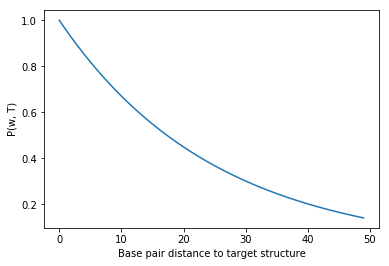

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns

target_length = 50
beta = -2

plt.plot([math.exp(beta * (bp_dist / float(target_length))) for bp_dist in range(target_length)])
plt.xlabel("Base pair distance to target structure")
plt.ylabel("P(w, T)")

Text(0, 0.5, 'P(w, T)')

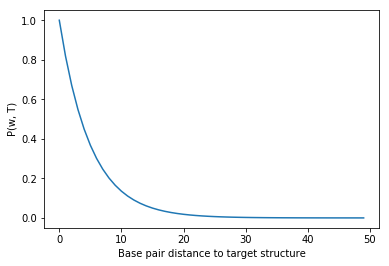

In [53]:
target_length = 50
beta = -10

plt.plot([math.exp(beta * (bp_dist / float(target_length))) for bp_dist in range(target_length)])
plt.xlabel("Base pair distance to target structure")
plt.ylabel("P(w, T)")

As you can see, $P(\omega, T)$ is a very simple function that evaluates to 1 (highest fitness) if the base pair distance is 0, and decreases as the structures get further and further away from the target. The plot didn't include the $N$ factor in the plotting as it will be a bit more annoying to compute, but it is simply a scaling factor so the shape and main idea won't be different.

Now we can use this function to get a fitness value for each Cell in our population. Let's first start with the *sixth* cell, just to do some **debugging**.

In [54]:
cell = pop[5]
print('cell.structure_1[-1]', cell.structure_1[-1])
print('cell.structure_2[-1]', cell.structure_2[-1])

print('target: ', target)
print('ss_to_bp()', ss_to_bp(target))

bp_distance_1 = bp_distance(cell.structure_1[-1], ss_to_bp(target))
bp_distance_2 = bp_distance(cell.structure_2[-1], ss_to_bp(target))
print('bp_distance_1', bp_distance_1)
print('bp_distance_2', bp_distance_2)

#use the bp_distances and the above fitness equation to calculate the fitness of each chromosome
fitness_1 = math.exp((beta * bp_distance_1 / float(len(cell.sequence_1))))
fitness_2 = math.exp((beta * bp_distance_2 / float(len(cell.sequence_2))))
print(fitness_1)
print(fitness_2)

#get the fitness of the whole cell by multiplying the fitnesses of each chromosome
cell.fitness = fitness_1 * fitness_2

#store the bp_distance of each chromosome.
cell.bp_distance_1 = bp_distance_1
cell.bp_distance_2 = bp_distance_2

cell.structure_1[-1] .((.(((.....))).))..
cell.structure_2[-1] ..(.(..(((.....)))))
target:  (.(((....).).).)....
ss_to_bp() {(2, 13), (4, 9), (3, 11), (0, 15)}
bp_distance_1 5
bp_distance_2 5
0.0820849986238988
0.0820849986238988


Ok, now we feel confident enough to tackle the general case. Let's write a function!

In [55]:
def compute_fitness(population, target, beta=-2):
    """
    Assigns a fitness and bp_distance value to each cell in the population.
    """
    #store the fitness values of each cell
    tot = []
    #iterate through each cell
    for cell in population:
        
        #calculate the bp_distance of each chromosome using the cell's structure
        bp_distance_1 = bp_distance(cell.structure_1[-1], ss_to_bp(target))
        bp_distance_2 = bp_distance(cell.structure_2[-1], ss_to_bp(target))
        
        #use the bp_distances and the above fitness equation to calculate the fitness of each chromosome
        fitness_1 = math.exp((beta * bp_distance_1 / float(len(cell.sequence_1))))
        fitness_2 = math.exp((beta * bp_distance_2 / float(len(cell.sequence_2))))

        #get the fitness of the whole cell by multiplying the fitnesses of each chromosome
        cell.fitness = fitness_1 * fitness_2
               
        #store the bp_distance of each chromosome.
        cell.bp_distance_1 = bp_distance_1
        cell.bp_distance_2 = bp_distance_2
    
        
        #add the cell's fitness value to the list of all fitness values (used for normalization later)
        tot.append(cell.fitness)

    #normalization factor is sum of all fitness values in population
    norm = np.sum(tot)
    #divide all fitness values by the normalization factor.
    for cell in population:
        cell.fitness = cell.fitness / norm

    return None

compute_fitness(pop, target)
for cell in pop[:10]:
    print(cell.fitness, cell.bp_distance_1, cell.bp_distance_2)

0.009295900502945329 5 5
0.009295900502945329 5 5
0.010273558893179964 4 5
0.010273558893179964 4 5
0.009295900502945329 5 5
0.009295900502945329 5 5
0.011354038513879935 3 5
0.00929590050294533 4 6
0.011354038513879935 4 4
0.010273558893179964 5 4


## Introducing diversity: Mutations

Evolution would go nowhere without **random mutations**. While mutations are technically just random errors in the copying of genetic material, they are essential in the process of evolution. This is because they introduce novel diversity to populatons, which with a low frequency can be beneficial. And when a beneficial mutation arises (i.e. a mutation that increases fitness, or replication probability) it quickly takes over the population and the populatioin as a whole has a higher fitness. Read about it [here](https://ghr.nlm.nih.gov/primer/mutationsanddisorders/genemutation).

Implementing mutations in our model will be straightforward. Since mutations happen at the genotype/sequence level, we simply have to iterate through our strings of nucleotides (sequences) and randomly introduce changes!


In [56]:
def mutate(sequence, mutation_rate=0.001):
    """Takes a sequence and mutates bases with probability mutation_rate"""
    
    #start an empty string to store the mutated sequence
    new_sequence = ""
    #boolean storing whether or not the sequence got mutated
    mutated = False
    #go through every bp in the sequence
    for bp in sequence:
        #generate a random number between 0 and 1
        r = random.random()
        #if r is below mutation rate, introduce a mutation
        if r < mutation_rate:
            #add a randomly sampled nucleotide to the new sequence
            new_sequence = new_sequence + random.choice("aucg")
            mutated = True
        else:
            #if the mutation condition did not get met, copy the current bp to the new sequence
            new_sequence = new_sequence + bp
            
    return (new_sequence, mutated)

sequence_to_mutate = 'AAAAGGAGUGUGUAUGU'
print(sequence_to_mutate)
print(mutate(sequence_to_mutate, mutation_rate=0.5))

AAAAGGAGUGUGUAUGU
('AAgAauccUGUGUuUgU', True)


## Selection

The final process in this evolution model is **selection**. Once you have populations with a diverse range of fitnesses, we need to select the **fittest individuals** and let them replicate and contribute offspring to the next generation. In real populations this is just the process of reproduction. If you're fit enough you will be likely to reproduce more than another individual who is not as well suited to the environment.

In order to represent this process in our model, we will use the fitness values that we assigned to each Cell earlier and use that to select replicating Cells. This is equivalent to sampling from a population with the sampling being weighted by the fitness of each Cell. Thankfully, `numpy.random.choice` comes to the rescue here. Once we have sampled enough Cells to build our next generation, we introduce mutations and compute the fitness values of the new generation.

Consider this your first practical introduction to the `numpy` python library. We'll officially introduce it next week.


In [57]:
def selection(population, target, mutation_rate=0.001, beta=-2):
    """
    Returns a new population with offspring of the input population
    """

    #select the sequences that will be 'parents' and contribute to the next generation
    parents = np.random.choice(population, len(population), p=[rna.fitness for rna in population], replace=True)

    #build the next generation using the parents list
    next_generation = []    
    for i, p in enumerate(parents):
        new_cell = Cell(p.sequence_1, p.structure_1, p.sequence_2, p.structure_2)
        new_cell.id = i
        new_cell.parent = p.id
        
        next_generation.append(new_cell)

    #introduce mutations in next_generation sequeneces and re-fold when a mutation occurs
    for rna in next_generation:      
        mutated_sequence_1, mutated_1 = mutate(rna.sequence_1, mutation_rate=mutation_rate)
        mutated_sequence_2, mutated_2 = mutate(rna.sequence_2, mutation_rate=mutation_rate)
        
        if mutated_1:
            rna.sequence_1 = mutated_sequence_1
            rna.structure_1 = nussinov(mutated_sequence_1)
        if mutated_2:
            rna.sequence_2 = mutated_sequence_2
            rna.structure_2 = nussinov(mutated_sequence_2)
        else:
            continue

    #update fitness values for the new generation
    compute_fitness(next_generation, target, beta=beta)

    return next_generation

next_gen = selection(pop, target)
for cell in next_gen[:10]:
    print(cell.sequence_1)

AUACCACGCUCGCCUCUUAC
ACGUGGCAGGCGGCGCAGAG
UUCAGAAAUCUACCGUCCCG
AACGUCCUGCAGGGGGGAUG
UGGUCUGUCUCACAGUCCUC
UGGGUUUGGCCACCGCGGAU
UGUAUAAUUCAGCGGACGUC
GAAUGGAGGUUAACUUAUAU
AACACGCGGCAGCUUUUUAC
GGUGGUAUACUUGAUGAUGA


# Gathering information on our populations

Here we simply store some statistics (in a dictionary) on the population at each generation such as the average base pair distance and the average fitness of the populations. 


In [58]:
def record_stats(pop, population_stats):
    """
    Takes a population list and a dictionary and updates it with stats on the population.
    """
    generation_bp_distance_1 = [rna.bp_distance_1 for rna in pop]
    generation_bp_distance_2 = [rna.bp_distance_2 for rna in pop]

    mean_bp_distance_1 = np.mean(generation_bp_distance_1)
    mean_bp_distance_2 = np.mean(generation_bp_distance_2)
    
    mean_fitness = np.mean([rna.fitness for rna in pop])


    population_stats.setdefault('mean_bp_distance_1', []).append(mean_bp_distance_1)
    population_stats.setdefault('mean_bp_distance_2', []).append(mean_bp_distance_2)
    
    population_stats.setdefault('mean_fitness', []).append(mean_fitness)
    
    return None

# And finally.... evolution

We can put all the above parts together in a simple function that does the following:

    start a new population and compute its fitness
    repeat the following for the desired number of generations:
        record statistics on population
        perform selection + utation
        store new population

And that's it! We have an evolutionary **reactor**!


In [59]:
def evolve(target, generations=10, pop_size=100, mutation_rate=0.001, beta=-2):
    """
    Takes target structure and sets up initial population, performs selection and iterates for desired generations.
    """
    #store list of all populations throughotu generations [[cells from generation 1], [cells from gen. 2]...]
    populations = []
    #start a dictionary that will hold some stats on the populations.
    population_stats = {}
    
    #get a starting population
    initial_population = populate(target, pop_size=pop_size)
    #compute fitness of initial population
    compute_fitness(initial_population, target)

    #set current_generation to initial population.
    current_generation = initial_population

    #iterate the selection process over the desired number of generations
    for i in range(generations):

        #let's get some stats on the structures in the populations   
        record_stats(current_generation, population_stats)
        
        #add the current generation to our list of populations.
        populations.append(current_generation)

        #select the next generation
        new_gen = selection(current_generation, target, mutation_rate=mutation_rate, beta=beta)
        #set current generation to be the generation we just obtained.
        current_generation = new_gen 
    
    return (populations, population_stats)

Try a run of the evolve() function.

In [62]:
pops, pops_stats = evolve("(((....)))", generations=20, pop_size=1000, mutation_rate=0.005, beta=-2)

Let's see if it actually worked by plotting the average base pair distance as a function of generations for both genes in each cell. We should expect a gradual decrease as the populations get closer to the target structure.

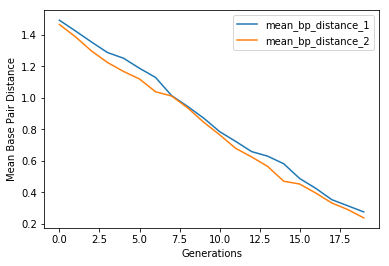

In [63]:
def evo_plot(pops_stats):
    """
    Plot base pair distance for each chromosome over generations.
    """
    for m in ['mean_bp_distance_1', 'mean_bp_distance_2']:
        plt.plot(pops_stats[m], label=m)
    plt.legend()
    plt.xlabel("Generations")
    plt.ylabel("Mean Base Pair Distance")
    
evo_plot(pops_stats)

You should see a nice drop in base pair distance! Another way of visualizing this is by plotting a histogram of the base pair distance of all Cells in the initial population versus the final population.

/Users/daflow312/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


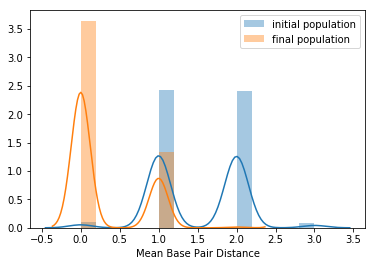

In [64]:
def bp_distance_distributions(pops):
    """
    Plots histograms of base pair distance in initial and final populations.
    """
    #plot bp_distance_1 for rnas in first population
    g = sns.distplot([rna.bp_distance_1 for rna in pops[0]], label='initial population')
    #plot bp_distance_1 for rnas in first population
    g = sns.distplot([rna.bp_distance_1 for rna in pops[-1]], label='final population')
    g.set(xlabel='Mean Base Pair Distance')
    g.legend()
    
bp_distance_distributions(pops)

# Introducing mating to the Model

The populations we generated evolved **asexually**. This means that individuals do not mate or exchange genetic information. 

So to make our simulation a bit more interesting let's let the Cells *mate*! This is going to require a few small changes in the `selection()` function. 

Previously, when we selected sequences to go into the next generation we just let them provide one offspring which was a copy of itself and introduced mutations. Now instead of choosing one Cell at a time, we will randomly choose two **parents** that will **mate**. When they mate, each parent will contribute one of its chromosomes to the child. We'll repeat this process until we have filled the next generation.

In [65]:
def selection_with_mating(population, target, mutation_rate=0.001, beta=-2):
    next_generation = []
    
    counter = 0
    while len(next_generation) < len(population):
        #select two parents based on their fitness
        parents_pair = np.random.choice(population, 2, p=[rna.fitness for rna in population], replace=False)
        
        #take the sequence and structure from the first parent's first chromosome and give it to the child
        child_chrom_1 = (parents_pair[0].sequence_1, parents_pair[0].structure_1)

        #do the same for the child's second chromosome and the second parent.
        child_chrom_2 = (parents_pair[1].sequence_2, parents_pair[1].structure_2)


        #initialize the new child Cell witht he new chromosomes.
        child_cell = Cell(child_chrom_1[0], child_chrom_1[1], child_chrom_2[0], child_chrom_2[1])

        #give the child and id and store who its parents are
        child_cell.id = counter
        child_cell.parent_1 = parents_pair[0].id
        child_cell.parent_2 = parents_pair[1].id

        #add the child to the new generation
        next_generation.append(child_cell)
        
        counter = counter + 1
            
        
    #introduce mutations in next_generation sequeneces and re-fold when a mutation occurs (same as before)
    for rna in next_generation:      
        mutated_sequence_1, mutated_1 = mutate(rna.sequence_1, mutation_rate=mutation_rate)
        mutated_sequence_2, mutated_2 = mutate(rna.sequence_2, mutation_rate=mutation_rate)

        if mutated_1:
            rna.sequence_1 = mutated_sequence_1
            rna.structure_1 = nussinov(mutated_sequence_1)
        if mutated_2:
            rna.sequence_2 = mutated_sequence_2
            rna.structure_2 = nussinov(mutated_sequence_2)
        else:
            continue

    #update fitness values for the new generation
    compute_fitness(next_generation, target, beta=beta)

    return next_generation    

#run a small test to make sure it works
next_gen = selection_with_mating(pop, target)
for cell in next_gen[:10]:
    print(cell.sequence_1)

CUAUGAGCUUCGGCUUGUAU
UGGGUUUGGCCACCGCGGAU
AGGAUACGGGGUUAAUACGU
CCACAAUACAGCCCAAACCG
AACACGCGGCAGCUUUUUAC
CGGAAGUAUUAUCGUCUCCG
GAUAGCUUCGGCCUCUACGA
CCUAGCGGACCUGACUUCUU
AUCGAUCGUUCUACCUGCAA
UGGGUUUGGCCACCGCGGAU


Now we just have to update our evolution() function to call the new `selection_with_mating()` function.

In [66]:
def evolve_with_mating(target, generations=10, pop_size=100, mutation_rate=0.001, beta=-2):
    populations = []
    population_stats = {}
    
    initial_population = populate(target, pop_size=pop_size)
    compute_fitness(initial_population, target)
        
    current_generation = initial_population

    #iterate the selection process over the desired number of generations
    for i in range(generations):
        #let's get some stats on the structures in the populations   
        record_stats(current_generation, population_stats)
        
        #add the current generation to our list of populations.
        populations.append(current_generation)

        #select the next generation, but this time with mutations
        new_gen = selection_with_mating(current_generation, target, mutation_rate=mutation_rate, beta=beta)
        current_generation = new_gen 
    
    return (populations, population_stats)

Try out the new evolution model!

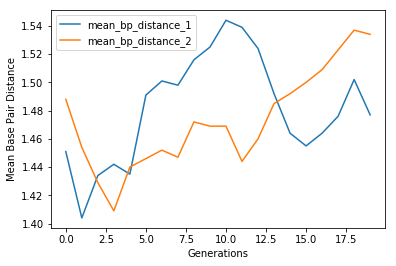

In [67]:
pops_mating, pops_stats_mating = evolve_with_mating("(((....)))", generations=20, pop_size=1000, beta=0)

evo_plot(pops_stats_mating)

Ok wow, so interesting, and so much to play with. And just to think that life is made out of this mahinery makes me giddly all over. Hope you had *fun* learning about biology and exercising your python.

Now let's see how we can put this machinery to use to help us draw better forests!